# Maersk AIML Assessment 
#### Name : Saahil Shaikh
Problem Statement: To develop a Machine Learning model to accurately predict the cost of sourcing of a product combination for June 2021, based on historical data provided from June 2020 to May 2021.


## 1. Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading train and test data
train_data = pd.read_csv('https://raw.githubusercontent.com/SaahilShaikh17/Maersk_AIML_Assessment/main/DS_ML%20Coding%20Challenge%20Dataset%20(1).xlsx%20-%20Training%20Dataset.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/SaahilShaikh17/Maersk_AIML_Assessment/main/DS_ML%20Coding%20Challenge%20Dataset%20(1).xlsx%20-%20Test%20Dataset.csv')

## 2. Understanding the data 

In [3]:
train_data.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76


In [4]:
train_data.tail()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
550171,NTM2,X1,A5,DIRECT,Large,Powder,Jul-20,136.47
550172,NTM3,X1,A14,DIRECT,Large,Liquid,Oct-20,72.56
550173,NTM2,X1,A5,DIRECT,Small,Powder,Mar-21,147.64
550174,NTM2,X1,A7,DIRECT,Small,Powder,Feb-21,150.04
550175,NTM1,X1,A3,DIRECT,Small,Powder,Nov-20,139.42


In [5]:
test_data.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,Jun-21,103.68
1,NTM1,X1,A10,DIRECT,Large,Powder,Jun-21,155.75
2,NTM1,X1,A10,ECOM,Large,Powder,Jun-21,143.02
3,NTM1,X1,A11,DIRECT,Large,Powder,Jun-21,139.39
4,NTM1,X1,A2,DIRECT,Large,Powder,Jun-21,169.42


In [6]:
train_data.shape

(550176, 8)

In [7]:
train_data.describe()

,Sourcing Cost
count,550176.000000
mean,108.817286
std,104.390093
min,-196.070000
25%,57.000000
50%,132.000000
75%,146.150000
max,32632.500000


Based on this it can be inferred that out of all the features present, 'Sourcing Cost' is a numerical feature. 

On further inspection, following are the inferences:
<ol>
    <li>There are 550176 data points present in the train dataset</li>
    <li>The average cost of sourcing is 108.82</li>
    <l1>The minimum value of sourcing cost is -196.07 which indicates nagative values and will have to be handled before model training</l1>
    <li>75% of the data lies below the upper quartile indicating the presence of outliers. This can be further visualised using box plots to get a clear understanding</li>
</ol>

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550176 entries, 0 to 550175
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ProductType        550176 non-null  object 
 1   Manufacturer       550176 non-null  object 
 2   Area Code          550176 non-null  object 
 3   Sourcing Channel   550176 non-null  object 
 4   Product Size       550176 non-null  object 
 5   Product Type       550176 non-null  object 
 6   Month of Sourcing  550176 non-null  object 
 7   Sourcing Cost      550176 non-null  float64
dtypes: float64(1), object(7)
memory usage: 33.6+ MB


From the results it can be observed that except the last feature sourcing cost, all others are of type object. 
Another key thing to be noted is that there are two features with the same name, 'ProductType' and 'Product Type' and even though the space between the naming of the two feature may help distinguish them, it may still cause ambiguity and thus the feature should be renamed

In [9]:
train_data.dtypes

ProductType           object
Manufacturer          object
Area Code             object
Sourcing Channel      object
Product Size          object
Product Type          object
Month of Sourcing     object
Sourcing Cost        float64
dtype: object

In [10]:
train_data.nunique()

ProductType             3
Manufacturer            3
Area Code              45
Sourcing Channel        4
Product Size            3
Product Type            2
Month of Sourcing      11
Sourcing Cost        4529
dtype: int64

Therefore, apart from the features 'Sourcing Cost' and 'Area Code', all other features are Categorical in nature. 

### 2.1 Data Issues

In [11]:
null_values = train_data.isnull().sum()
print("Null Values:\n", null_values)

duplicate_rows = train_data[train_data.duplicated()]
print("\nDuplicate Rows:\n", duplicate_rows)

print("\n The number of duplicate values present: ", train_data.duplicated().sum())

Null Values:
 ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64

Duplicate Rows:
        ProductType Manufacturer Area Code Sourcing Channel Product Size  \
63            NTM2           X1       A29           DIRECT        Small   
68            NTM2           X2       A25           DIRECT        Small   
86            NTM1           X1        A7             ECOM        Small   
88            NTM2           X1        A7             ECOM        Large   
93            NTM2           X1       A19           DIRECT        Large   
...            ...          ...       ...              ...          ...   
550171        NTM2           X1        A5           DIRECT        Large   
550172        NTM3           X1       A14           DIRECT        Large   
550173        NTM2           X1        A5           DIRECT        Small   
550174        NTM2   

No null values are present in the dataset, but the presence of multiple duplicates is observed. 
To handle thus, the duplicates could be dropped but as mentioned in the dataset description, 'we can find multiple rows with the same combination in the training dataset displaying their importance'. And thus we need not drop the duplicate values.

In [12]:
unique_columns = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size','Product Type', 'Month of Sourcing']
is_unique = train_data.duplicated(subset=unique_columns).any()

if is_unique:
    print("The combination of columns is not unique.")
else:
    print("The combination of columns is unique.")

The combination of columns is not unique.


Since there is no combination which can uniquely identify, it brings us to the question, How will the model perform with and without the removal of duplicates?. Hence, paving way for two more piplelines, one with duplicates removed and one without.

In [13]:
null_values = test_data.isnull().sum()
print("Null Values:\n", null_values)

duplicate_rows = test_data[test_data.duplicated()]
print("\nDuplicate Rows:\n", duplicate_rows)

print("\n The number of duplicate values present: ", test_data.duplicated().sum())

Null Values:
 ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64

Duplicate Rows:
 Empty DataFrame
Columns: [ProductType, Manufacturer, Area Code, Sourcing Channel, Product Size, Product Type, Month of Sourcing, Sourcing Cost]
Index: []

 The number of duplicate values present:  0


## 3. EDA

Some major questions that need to be addressed through EDA would be:

<ol>
    <li>The presence of trend and seasonality?</li>
    <li>What is the distribution/spread of our data?</li>
    <li>How do different combinations of features affect the sourcing cost?</li>
    <li>Does the area code play any role in determining the sourcing cost?</li>
    <li>Do outliers exist in our data? If yes, then are they legitimate or can they be dropped?</li>
    <li>How does sourcing cost vary over time?</li>
</ol>

In [14]:
# Seperating numerical and categorical datatypes
categorical_cols = train_data.select_dtypes(include=['object']).columns
numerical_cols = train_data.select_dtypes(include=np.number).columns.tolist()

print(categorical_cols)
print(numerical_cols)

Index(['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel',
       'Product Size', 'Product Type', 'Month of Sourcing'],
      dtype='object')
['Sourcing Cost']


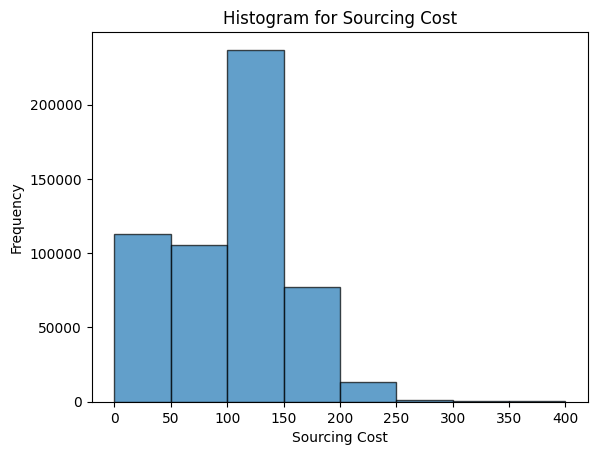

In [15]:
plt.hist(train_data['Sourcing Cost'], bins=8,range=(0,400) , edgecolor='black', alpha=0.7)
plt.xlabel('Sourcing Cost')
plt.ylabel('Frequency')
plt.title('Histogram for Sourcing Cost')
plt.show()

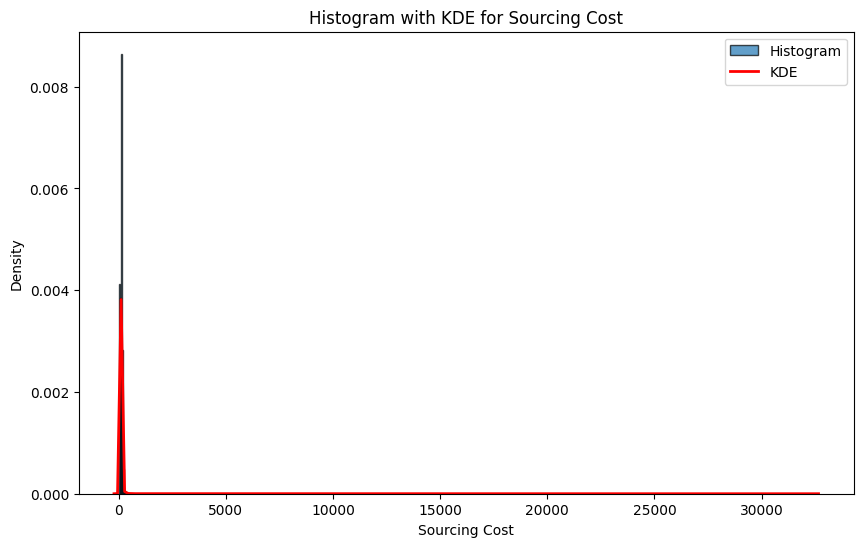

In [16]:
plt.figure(figsize=(10, 6))

plt.hist(train_data['Sourcing Cost'], bins=8, range=(0, 400), edgecolor='black', alpha=0.7, density=True, label='Histogram')

sns.kdeplot(train_data['Sourcing Cost'], color='red', linewidth=2, label='KDE')

plt.xlabel('Sourcing Cost')
plt.ylabel('Density')  
plt.title('Histogram with KDE for Sourcing Cost')
plt.legend()

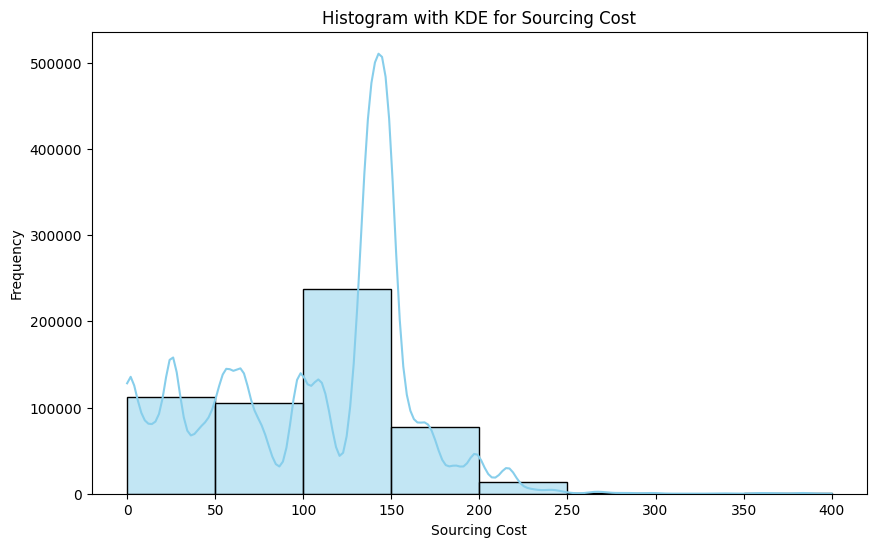

In [17]:
filtered_data = train_data[(train_data['Sourcing Cost'] >= 0) & (train_data['Sourcing Cost'] <= 400)]

plt.figure(figsize=(10, 6))

sns.histplot(filtered_data['Sourcing Cost'], bins=8, kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Sourcing Cost')
plt.ylabel('Frequency')
plt.title('Histogram with KDE for Sourcing Cost')

plt.show()

In [18]:
skewness = (train_data['Sourcing Cost']).skew()

print('Skewness: ', skewness) 


Skewness:  131.9235599905821


Based on the above plots, it was understood that majority of data points had a sourcing cost between 100-150 and most of the data points lied between 0-250. Further on analysing the skewness, positive skewness was observed and should be converted to normal distribution

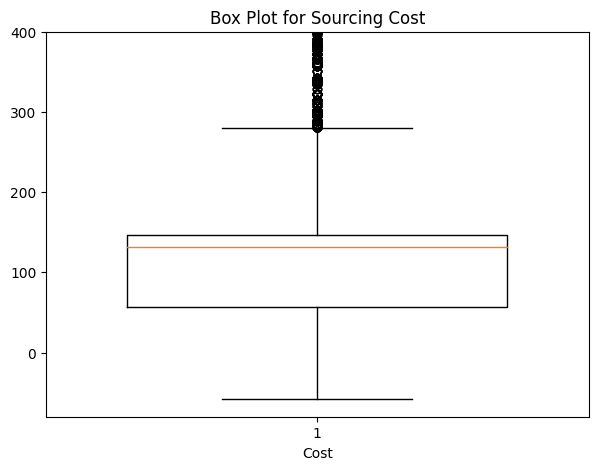

In [19]:
#Box plot to detect outliers in numerical column 
plt.figure(figsize=(7, 5))  
plt.boxplot(train_data['Sourcing Cost'], vert=True, widths=0.7)
plt.xlabel('Cost')
plt.title('Box Plot for Sourcing Cost')
plt.ylim(-80,400)
plt.show()

In [20]:
# Detecting the number of outliers using the z-score method
outliers = []
def detect_outliers(data):
    data = sorted(data)
    count=0
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lower_bound = q1-(1.5*IQR)
    upper_bound = q3+(1.5*IQR)
    for i in data: 
        if (i<lower_bound or i>upper_bound):
            outliers.append(i)
            count += 1
    return outliers,count
outliers,count = detect_outliers(train_data['Sourcing Cost'])
print("Outliers from IQR method: ", outliers)
print("\nThe number of outliers present are: ",count)

Outliers from IQR method:  [-196.07, -196.07, -147.03, -147.03, -147.03, -147.03, -147.03, -121.16, -121.16, -121.16, -119.41, -119.41, -119.41, -119.41, 280.9, 280.9, 280.9, 280.9, 280.9, 280.9, 280.9, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 281.4, 282.48, 282.48, 282.48, 282.48, 282.48, 282.6, 282.6, 282.6, 282.6, 282.6, 282.6, 282.6, 282.6, 282.86, 282.86, 282.86, 282.86, 282.86, 282.86, 282.86, 282.86, 282.86, 282.86, 282.86, 282.86, 282.86, 282.86, 282.86, 282.86, 282.86, 282.86, 282.86, 282.86, 282.86, 282.86, 282.86, 282.86, 282.86, 282.86, 283.69, 283.69, 283.69, 283.69,

Upon calculating the outliers using the IQR, the number of outliers present in the data is massive and thus removing them does not seem like a feasible option since they might reduce the diversity of the training data and might be genuine outliers. 
Another question that arises is that can sourcing cost be negative or is it an error in data? 
Assuming that it is erroneous data under the explanation that no matter how small there will be a sourcing cost associated with a product, It should be removed and will be removed in the further steps.

Apart from that, other techniques to handle outliers will be explored.

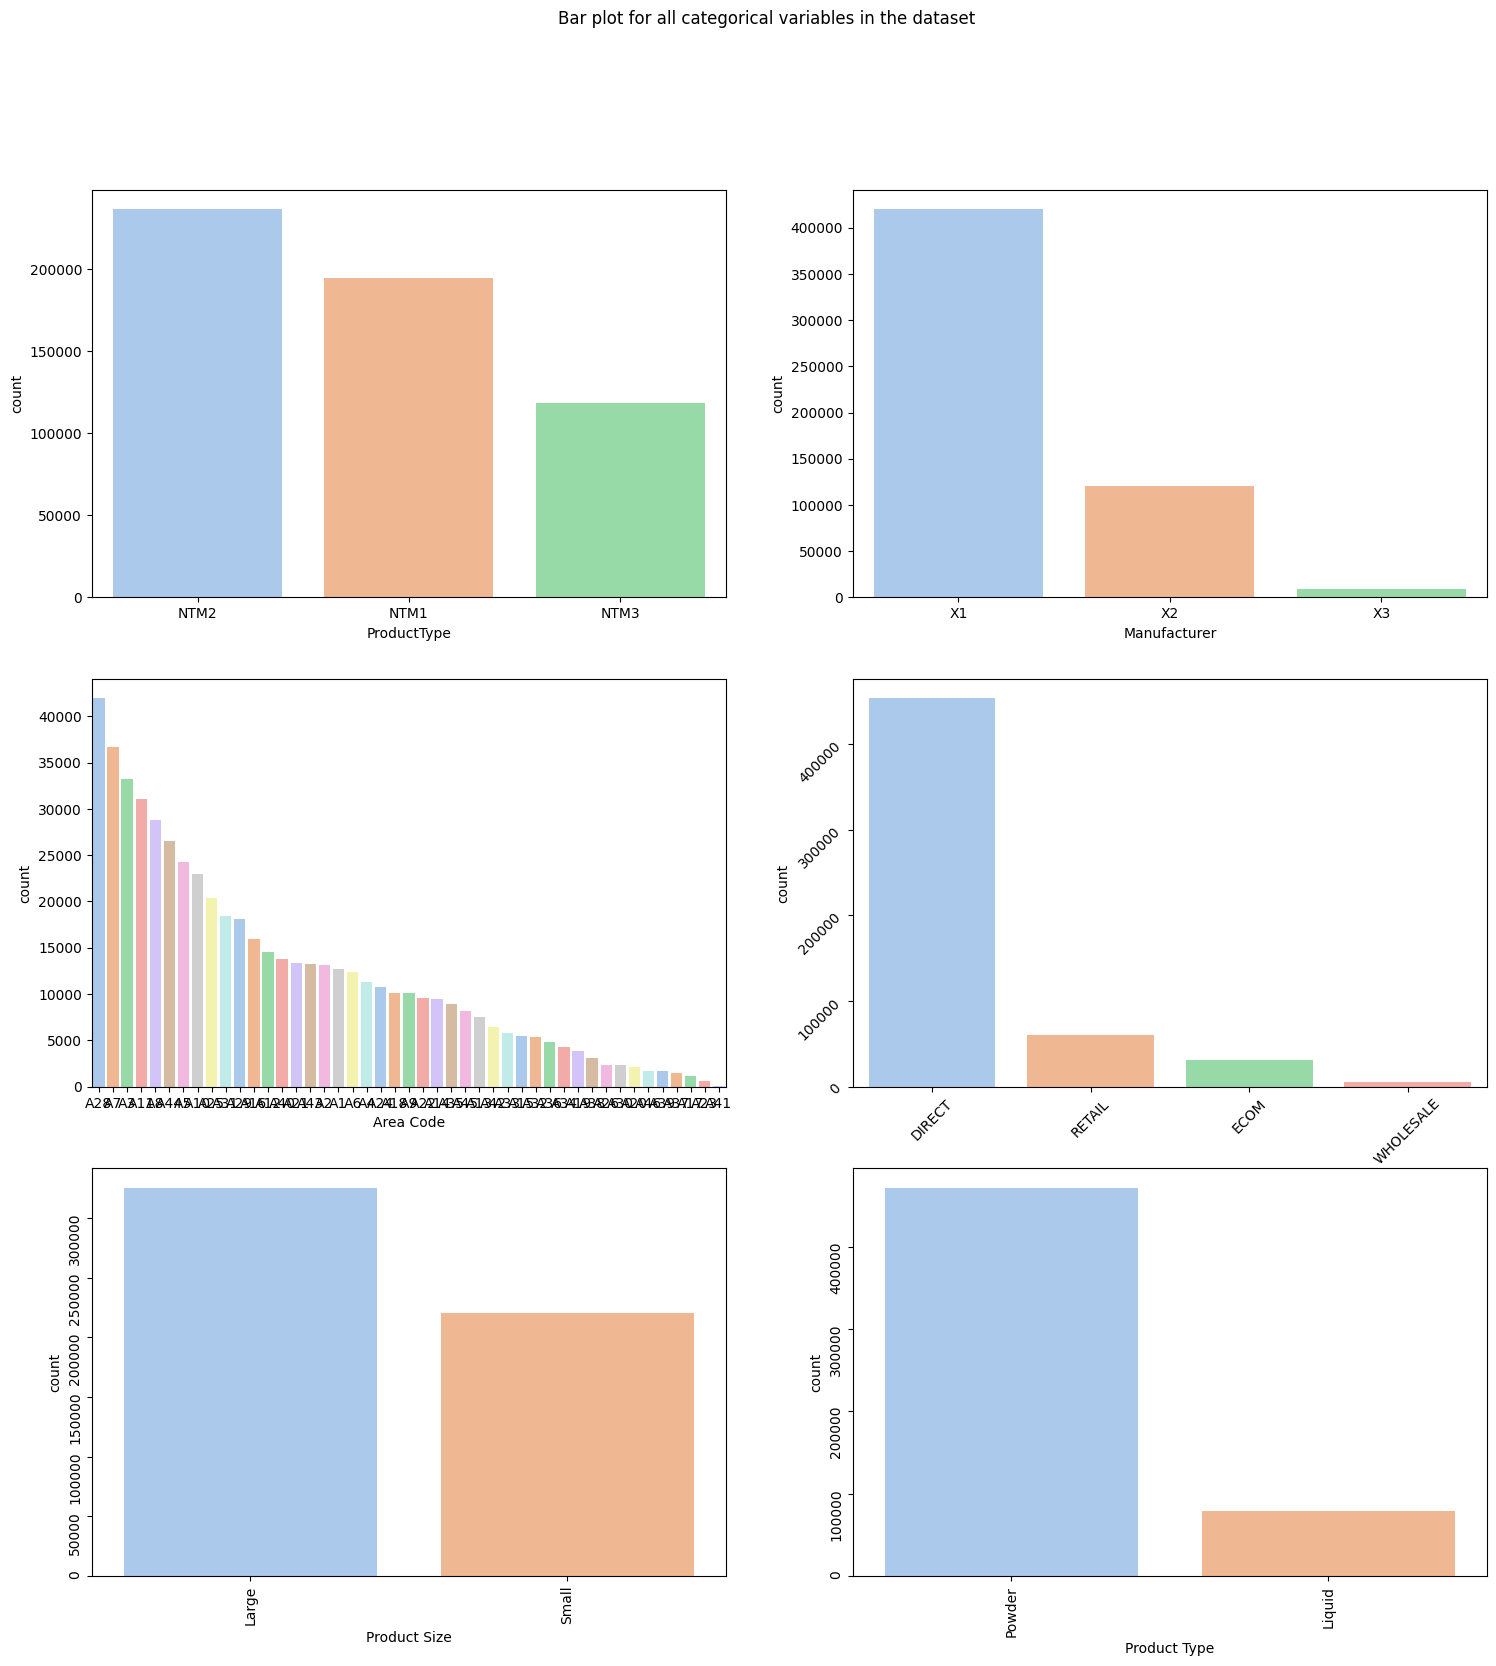

In [21]:
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'ProductType', data = train_data, palette = 'pastel', 
              order = train_data['ProductType'].value_counts().index)
sns.countplot(ax = axes[0, 1], x = 'Manufacturer', data = train_data,  palette = 'pastel', 
              order = train_data['Manufacturer'].value_counts().index)
sns.countplot(ax = axes[1, 0], x = 'Area Code', data = train_data, palette = 'pastel', 
              order = train_data['Area Code'].value_counts().index)
sns.countplot(ax = axes[1, 1], x = 'Sourcing Channel', data = train_data, palette = 'pastel', 
              order = train_data['Sourcing Channel'].value_counts().index)
sns.countplot(ax = axes[2, 0], x = 'Product Size', data = train_data, palette = 'pastel', 
              order = train_data['Product Size'].head(20).value_counts().index)
sns.countplot(ax = axes[2, 1], x = 'Product Type', data = train_data,palette = 'pastel', 
              order = train_data['Product Type'].head(20).value_counts().index)
axes[1][1].tick_params(labelrotation=45)
axes[2][0].tick_params(labelrotation=90)
axes[2][1].tick_params(labelrotation=90)

From the count plots, these are the observations:
<ol>
    <li>Majority of the units sourced had ProductType NTM2.</li>
    <li>Manufactuurer X1 had a clear win over the X2 and X3. Products from X1 was preferred the most.</li>
    <li>The Area code A28 was from where most of the sourcing requests came from. (Assuming that area code implies the area from which the sourcing request originated from)</li>
    <li>Direct sourcing channels were largely preferred from retail, ecom and wholesale showcasing more trust over that channel</li>
    <li>Most Product sizes were Large in nature and were powdered in Nature as opposed to the miniscule Liquid </li>
</ol>

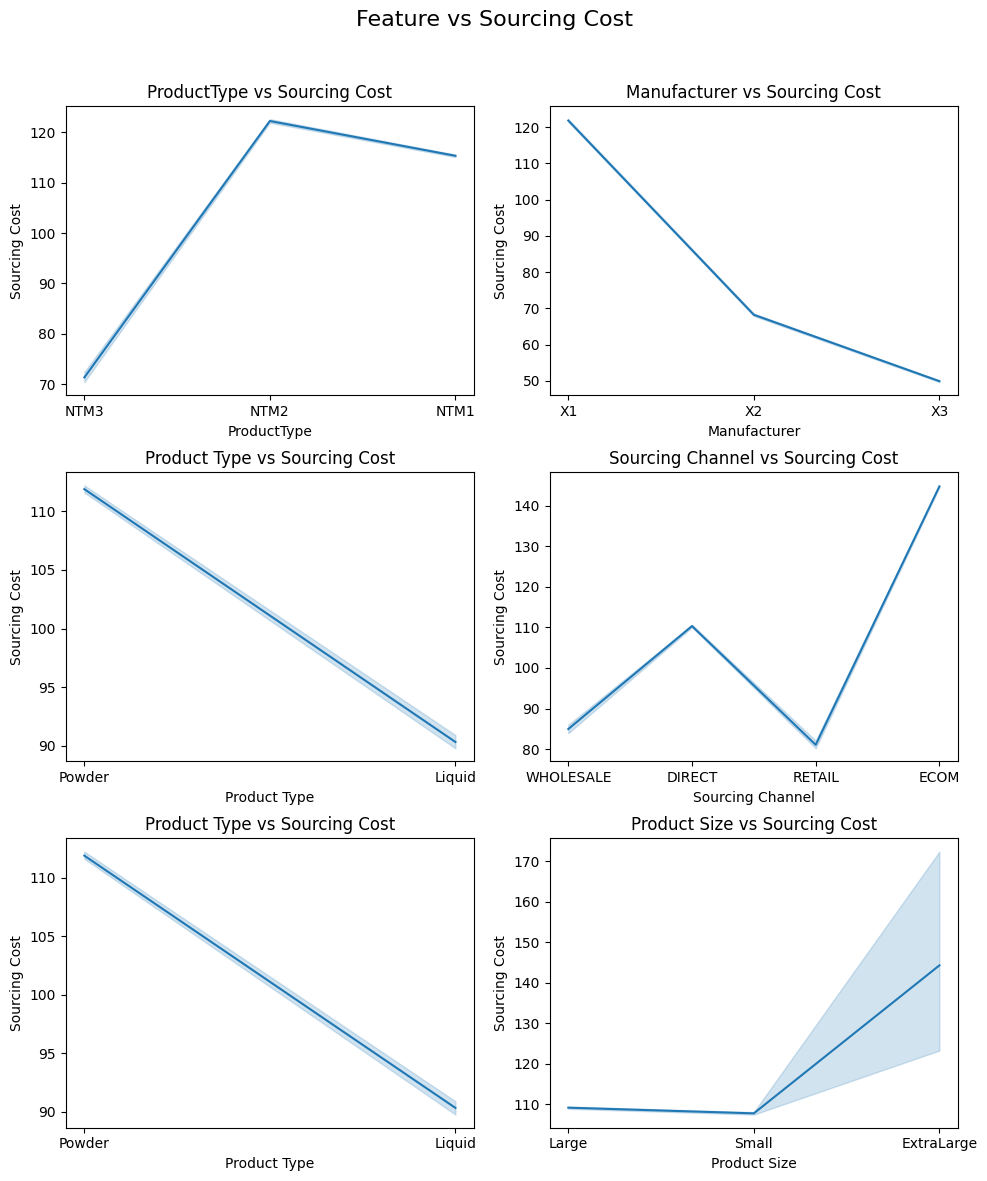

In [22]:
selected_features = [
    'ProductType', 'Manufacturer', 'Product Type',
    'Sourcing Channel', 'Product Type','Product Size' ,'Sourcing Cost'
]

num_features_to_plot = len(selected_features) - 1

rows = (num_features_to_plot // 2) + (num_features_to_plot % 2)  
cols = 2 if num_features_to_plot > 2 else 1  
fig, axes = plt.subplots(rows, cols, figsize=(10, 12)) 

fig.suptitle('Feature vs Sourcing Cost', fontsize=16)

for i, feature in enumerate(selected_features):
    if feature == 'Sourcing Cost':
        continue  # Skip the target variable

    
    if i >= num_features_to_plot:
        break  # Stop iterating if all features are plotted

    ax = axes[i // cols, i % cols]  # Access axes based on rows and columns
    sns.lineplot(data=train_data, x=feature, y='Sourcing Cost', ax=ax)
    ax.set_title(f'{feature} vs Sourcing Cost')

 

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

According to a bussiness perspective, the goal is to minimise the cost incurred for sourcing a product to the user, and hence based on that the following observations follow:

<ol>
    <li>Product type NTM3 has the least cost of sourcing as compared to the others</li>
    <li>While products from manufacturer X3 have the least sourcing cost and X1 the most</li>
    <li>Powdered products require higher cost of handling as compared to liquid products</li>
    <li>Wholesale products incur the lowest cost whereas products to be sourced from the ECOM channel have the highest</li>

Hence, a combination of the above would ideally have the least cost of sourcing.
</ol>

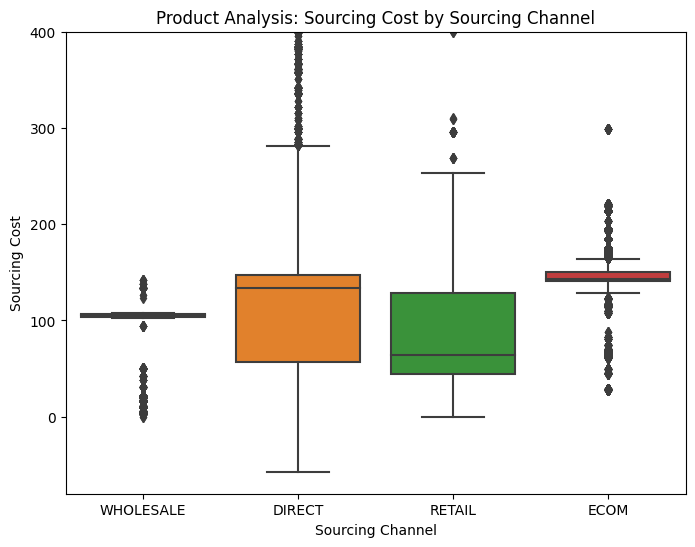

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=train_data, x='Sourcing Channel', y='Sourcing Cost')
plt.title('Product Analysis: Sourcing Cost by Sourcing Channel')
plt.xlabel('Sourcing Channel')
plt.ylabel('Sourcing Cost')
plt.ylim(-80,400)
plt.show()

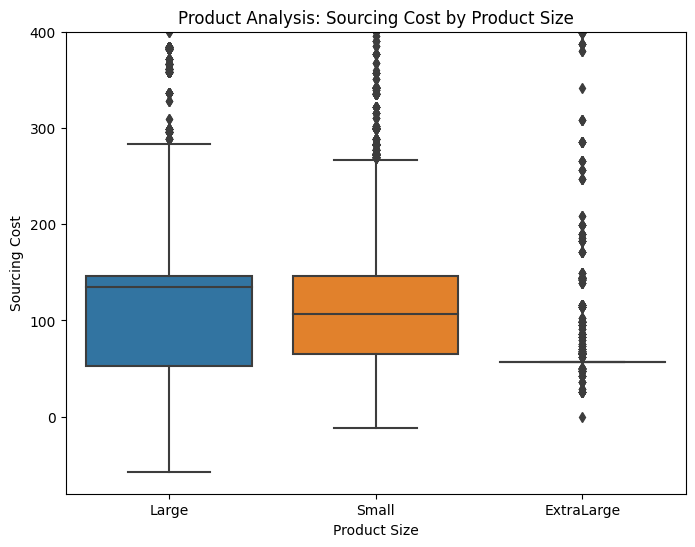

In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=train_data, x='Product Size', y='Sourcing Cost')
plt.title('Product Analysis: Sourcing Cost by Product Size')
plt.xlabel('Product Size')
plt.ylim(-80,400)
plt.ylabel('Sourcing Cost')
plt.show()

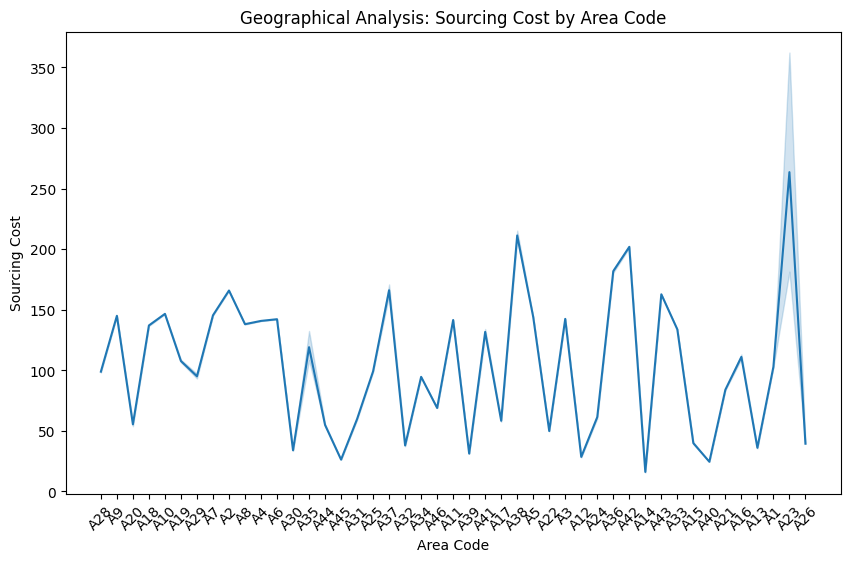

In [25]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=train_data, x='Area Code', y='Sourcing Cost')

plt.xticks(rotation=45) 

plt.title('Geographical Analysis: Sourcing Cost by Area Code')
plt.xlabel('Area Code')
plt.ylabel('Sourcing Cost')
plt.show()


Therefore, on the basis of geographical analysis it can be understood that the cost of sourcing to area code A23 is the highest and area code A14 is the lowest. Thus, alternate ways to reduce the cost of sourcing to these areas must be devised

In [26]:
train_data['Month of Sourcing'] = pd.to_datetime(train_data['Month of Sourcing'], format='%b-%y')


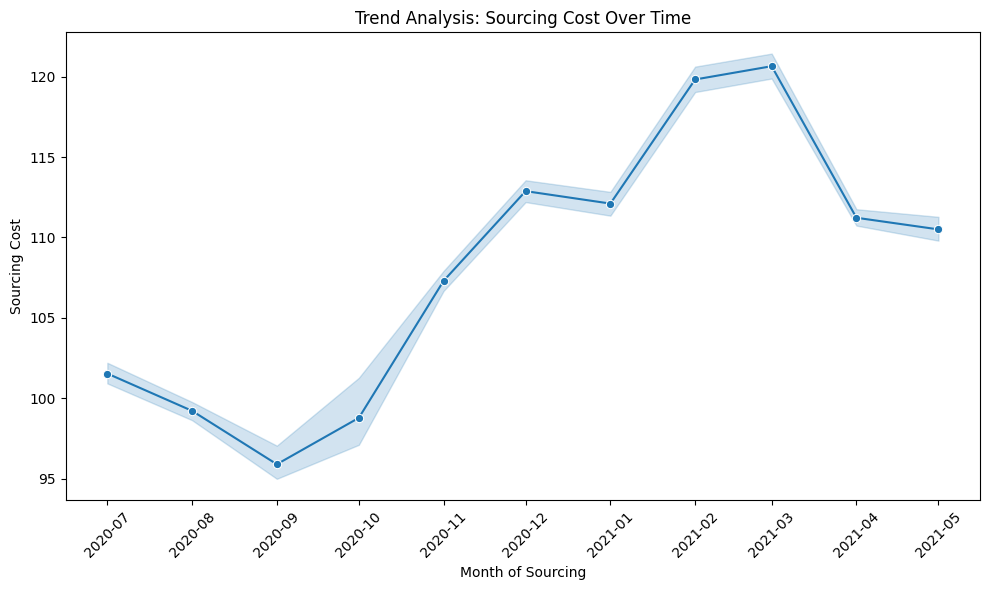

In [27]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=train_data, x='Month of Sourcing', y='Sourcing Cost', marker='o')
plt.title('Trend Analysis: Sourcing Cost Over Time')
plt.xlabel('Month of Sourcing')
plt.ylabel('Sourcing Cost')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

If we analyse the sourcing cost over time we find that the cost of sourcing was the least in September-2020 and gradually went on to increase hitting a peak at March-2023 where it was the highest. Thus, high sourcing cost values are observed around the months of February and March, 2021.

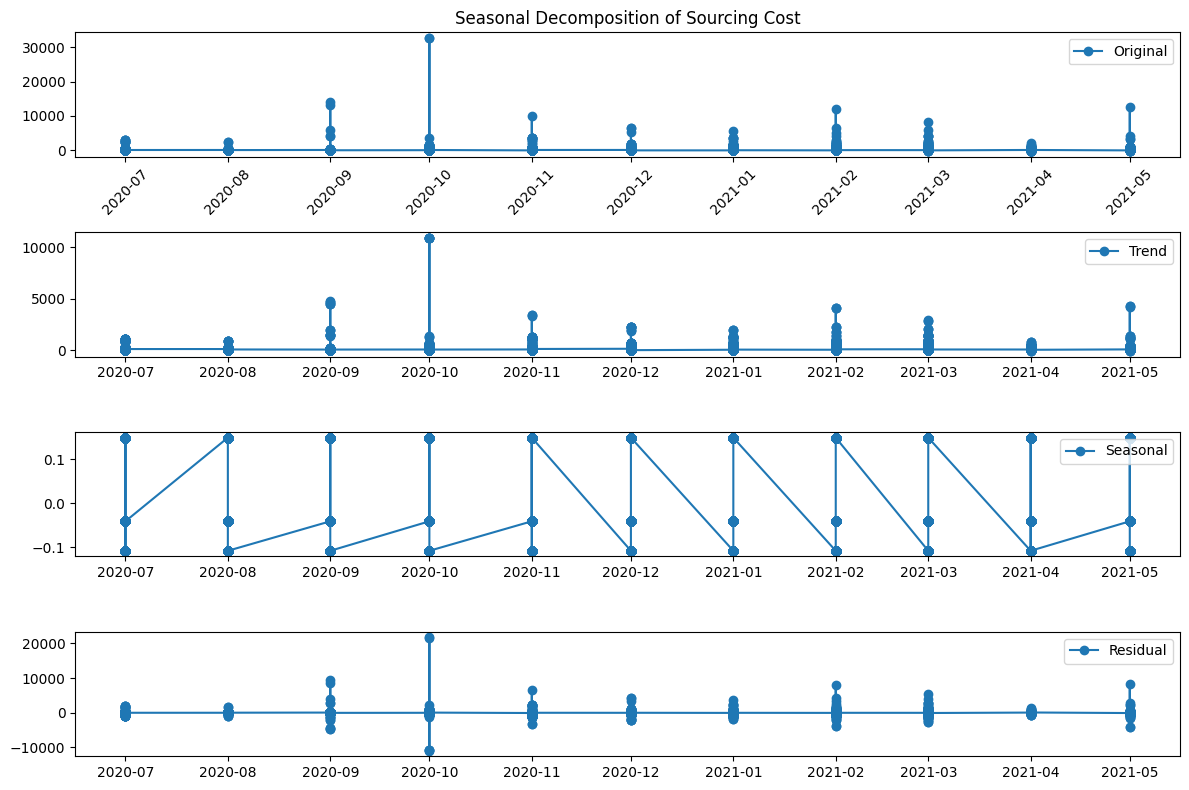

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
train_data.set_index('Month of Sourcing', inplace=True)

train_data.sort_index(inplace=True)
# Decompose time series
decomposition = seasonal_decompose(train_data['Sourcing Cost'], period=3,model='additive')

# Extract decomposition components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))

# Plot decomposition components
plt.subplot(411)
plt.plot(train_data.index, train_data['Sourcing Cost'], label='Original', marker='o')
plt.legend(loc='best')
plt.title('Seasonal Decomposition of Sourcing Cost')
plt.xticks(rotation=45)

plt.subplot(412)
plt.plot(train_data.index, trend, label='Trend', marker='o')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(train_data.index, seasonal, label='Seasonal', marker='o')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(train_data.index, residual, label='Residual', marker='o')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


Since it is confusing, to understand wheher trend and seasonality exists with the naked eye, statistical tests such as KPSS and ADF can be performed to understand whether our data is staionery or not. Also, a comparision between the additive and multiplicative models will be done

## 4. Data Preprocessing

### 4.1 Handling negative values present in Sourcing Cost

In [29]:
def remove_negative_outliers(data, column_name):

  filtered_data = data.copy() 

  # Calculate IQR and bounds for the specified column
  q1 = np.percentile(filtered_data[column_name], 25)
  q3 = np.percentile(filtered_data[column_name], 75)
  IQR = q3 - q1
  lower_bound = q1 - (1.5 * IQR)
  upper_bound = q3 + (1.5 * IQR)

  # Filter data to remove negative outliers while keeping valid data points
  filtered_data = filtered_data[
      (filtered_data[column_name] >= lower_bound) & (filtered_data[column_name] <= upper_bound) & (filtered_data[column_name] >= 0)
  ]
  return filtered_data

column_name = 'Sourcing Cost' 
train_data_filtered = remove_negative_outliers(train_data.copy(), column_name)

# Print the filtered data
print(train_data.shape)
print(train_data_filtered.shape)

(550176, 7)
(547340, 7)


Thus all negative values present have been removed based on the assumption made previously.

### 4.2 Handling Outliers

Since, the number of outliers is large, approximately 2600 values removing them would not be good practice as we could lose quality of our data along with genuine outlier values hence, different techniques to handle these outliers will be explored such as transformation and winsorization.

As the data is positively skewed, applying a transofrmation such as logarithmic can mitigate skewness along with reducing the impact of outliers on the data as well.

In [30]:

def apply_log_transform(data, column_name):
  filtered_data = data.copy()  # Create a copy to avoid modifying the original DataFrame

  filtered_data[column_name] = np.log(filtered_data[column_name] + 1)

  return filtered_data

column_name = 'Sourcing Cost'  

train_data_transformed = apply_log_transform(train_data_filtered.copy(), column_name)

print(train_data_transformed)


                  ProductType Manufacturer Area Code Sourcing Channel  \
Month of Sourcing                                                       
2020-07-01               NTM1           X1        A8           DIRECT   
2020-07-01               NTM2           X1       A29           DIRECT   
2020-07-01               NTM1           X1       A10           DIRECT   
2020-07-01               NTM1           X1        A3           DIRECT   
2020-07-01               NTM2           X1       A26           DIRECT   
...                       ...          ...       ...              ...   
2021-05-01               NTM2           X1       A28           DIRECT   
2021-05-01               NTM3           X1       A25           RETAIL   
2021-05-01               NTM1           X1        A1           DIRECT   
2021-05-01               NTM2           X1       A28           DIRECT   
2021-05-01               NTM3           X1       A28        WHOLESALE   

                  Product Size Product Type  Sourc

In [31]:
train_data_transformed.columns

Index(['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel',
       'Product Size', 'Product Type', 'Sourcing Cost'],
      dtype='object')

In [32]:
train_data_transformed['Sourcing Cost'].skew()

-2.3351659697350073

Since after applying the log tranform the skewness value has reduced -2.33, it shows signs of negative skewness and is not acceptable as the ideal range should be close to zero and thus other transformations should be applied


In [33]:
# Square root transformation
def apply_sqrt_transform(data, column_name):
  filtered_data = data.copy()  # Create a copy to avoid modifying the original DataFrame
  filtered_data[column_name] = np.sqrt(np.abs(filtered_data[column_name]))

  return filtered_data

column_name = 'Sourcing Cost'  

train_data_transformed = apply_sqrt_transform(train_data.copy(), column_name)


train_data_transformed.head()


,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Sourcing Cost
Month of Sourcing,,,,,,,
2020-07-01,NTM1,X1,A8,DIRECT,Large,Powder,11.601724
2020-07-01,NTM2,X1,A29,DIRECT,Small,Powder,7.517978
2020-07-01,NTM1,X1,A10,DIRECT,Large,Powder,11.631423
2020-07-01,NTM1,X1,A3,DIRECT,Small,Powder,11.701282
2020-07-01,NTM2,X1,A26,DIRECT,Small,Powder,6.218521


In [34]:
train_data_transformed['Sourcing Cost'].skew()

0.17827712942241836

As this value is closest to zero, we can move ahead with the square root transformation of our data. Similarly the same should be applied to our test data to ensure consistency

In [35]:
test_data['Month of Sourcing'] = pd.to_datetime(test_data['Month of Sourcing'], format='%b-%y')
test_data.set_index('Month of Sourcing', inplace=True)
test_data.sort_index(inplace=True)
test_data_transformed = apply_sqrt_transform(test_data.copy(),'Sourcing Cost')

In [36]:
test_data_transformed.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Sourcing Cost
Month of Sourcing,,,,,,,
2021-06-01,NTM1,X1,A1,DIRECT,Small,Powder,10.182338
2021-06-01,NTM1,X1,A10,DIRECT,Large,Powder,12.479984
2021-06-01,NTM1,X1,A10,ECOM,Large,Powder,11.959097
2021-06-01,NTM1,X1,A11,DIRECT,Large,Powder,11.806354
2021-06-01,NTM1,X1,A2,DIRECT,Large,Powder,13.016144


Thus, our dataframe is normally distributed and is more robust in handling outliers.

### 4.3 Encoding categorical features

There are 5 categorical features present in the data which are: ProductType, Manufacturer, Sourcing Channel, Product Size, and Product Type.
These features will be One Hot Encoded as they are small in number and can be encoded easily with it.

But applying one hot encoding to area code isn't feasible as there are approximatelyy 45 unique values present in the feature and thus applying Label Encoding to the feature makes more sense as a unique label can be assigned to each area code.

In [65]:
one_hot_train_data = pd.get_dummies(train_data_transformed, columns=['ProductType', 'Manufacturer', 'Sourcing Channel', 'Product Size', 'Product Type'])
one_hot_test_data = pd.get_dummies(test_data_transformed, columns=['ProductType', 'Manufacturer', 'Sourcing Channel', 'Product Size', 'Product Type'])

In [66]:
one_hot_train_data.head()

,Area Code,Sourcing Cost,ProductType_NTM1,ProductType_NTM2,ProductType_NTM3,Manufacturer_X1,Manufacturer_X2,Manufacturer_X3,Sourcing Channel_DIRECT,Sourcing Channel_ECOM,Sourcing Channel_RETAIL,Sourcing Channel_WHOLESALE,Product Size_ExtraLarge,Product Size_Large,Product Size_Small,Product Type_Liquid,Product Type_Powder
Month of Sourcing,,,,,,,,,,,,,,,,,
2020-07-01,A8,11.601724,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True
2020-07-01,A29,7.517978,False,True,False,True,False,False,True,False,False,False,False,False,True,False,True
2020-07-01,A10,11.631423,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True
2020-07-01,A3,11.701282,True,False,False,True,False,False,True,False,False,False,False,False,True,False,True
2020-07-01,A26,6.218521,False,True,False,True,False,False,True,False,False,False,False,False,True,False,True


In [68]:
one_hot_test_data.head()

,Area Code,Sourcing Cost,ProductType_NTM1,ProductType_NTM2,ProductType_NTM3,Manufacturer_X1,Manufacturer_X2,Manufacturer_X3,Sourcing Channel_DIRECT,Sourcing Channel_ECOM,Sourcing Channel_RETAIL,Sourcing Channel_WHOLESALE,Product Size_ExtraLarge,Product Size_Large,Product Size_Small,Product Type_Liquid,Product Type_Powder
Month of Sourcing,,,,,,,,,,,,,,,,,
2021-06-01,A1,10.182338,True,False,False,True,False,False,True,False,False,False,False,False,True,False,True
2021-06-01,A10,12.479984,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True
2021-06-01,A10,11.959097,True,False,False,True,False,False,False,True,False,False,False,True,False,False,True
2021-06-01,A11,11.806354,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True
2021-06-01,A2,13.016144,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True


In [69]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
area_code_encoder = LabelEncoder()

one_hot_train_data['Area Code'] = area_code_encoder.fit_transform(one_hot_train_data['Area Code'])
one_hot_test_data['Area Code'] = area_code_encoder.fit_transform(one_hot_test_data['Area Code'])

In [70]:
train_encoded_data = one_hot_train_data.copy()
test_encoded_data = one_hot_test_data.copy()

In [71]:
train_encoded_data.head()

,Area Code,Sourcing Cost,ProductType_NTM1,ProductType_NTM2,ProductType_NTM3,Manufacturer_X1,Manufacturer_X2,Manufacturer_X3,Sourcing Channel_DIRECT,Sourcing Channel_ECOM,Sourcing Channel_RETAIL,Sourcing Channel_WHOLESALE,Product Size_ExtraLarge,Product Size_Large,Product Size_Small,Product Type_Liquid,Product Type_Powder
Month of Sourcing,,,,,,,,,,,,,,,,,
2020-07-01,43,11.601724,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True
2020-07-01,20,7.517978,False,True,False,True,False,False,True,False,False,False,False,False,True,False,True
2020-07-01,1,11.631423,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True
2020-07-01,21,11.701282,True,False,False,True,False,False,True,False,False,False,False,False,True,False,True
2020-07-01,18,6.218521,False,True,False,True,False,False,True,False,False,False,False,False,True,False,True


In [72]:
test_encoded_data.head()

,Area Code,Sourcing Cost,ProductType_NTM1,ProductType_NTM2,ProductType_NTM3,Manufacturer_X1,Manufacturer_X2,Manufacturer_X3,Sourcing Channel_DIRECT,Sourcing Channel_ECOM,Sourcing Channel_RETAIL,Sourcing Channel_WHOLESALE,Product Size_ExtraLarge,Product Size_Large,Product Size_Small,Product Type_Liquid,Product Type_Powder
Month of Sourcing,,,,,,,,,,,,,,,,,
2021-06-01,0,10.182338,True,False,False,True,False,False,True,False,False,False,False,False,True,False,True
2021-06-01,1,12.479984,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True
2021-06-01,1,11.959097,True,False,False,True,False,False,False,True,False,False,False,True,False,False,True
2021-06-01,2,11.806354,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True
2021-06-01,11,13.016144,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True


In [91]:
train_encoded_data.columns

Index(['Area Code', 'Sourcing Cost', 'ProductType_NTM1', 'ProductType_NTM2',
       'ProductType_NTM3', 'Manufacturer_X1', 'Manufacturer_X2',
       'Manufacturer_X3', 'Sourcing Channel_DIRECT', 'Sourcing Channel_ECOM',
       'Sourcing Channel_RETAIL', 'Sourcing Channel_WHOLESALE',
       'Product Size_ExtraLarge', 'Product Size_Large', 'Product Size_Small',
       'Product Type_Liquid', 'Product Type_Powder', 'Month'],
      dtype='object')

### 4.4 Stationarity of Sourcing Cost
As cost of sourcing varies over time (months) in terms of our problem, we need to check if our data is stationery or not. This is because stationarity of our data is a pre-requisite for many machine learning models. This can be done using statistical test like ADF as the seasonal decomposition graphs could not be interpreted easily because of the number of data points being high.

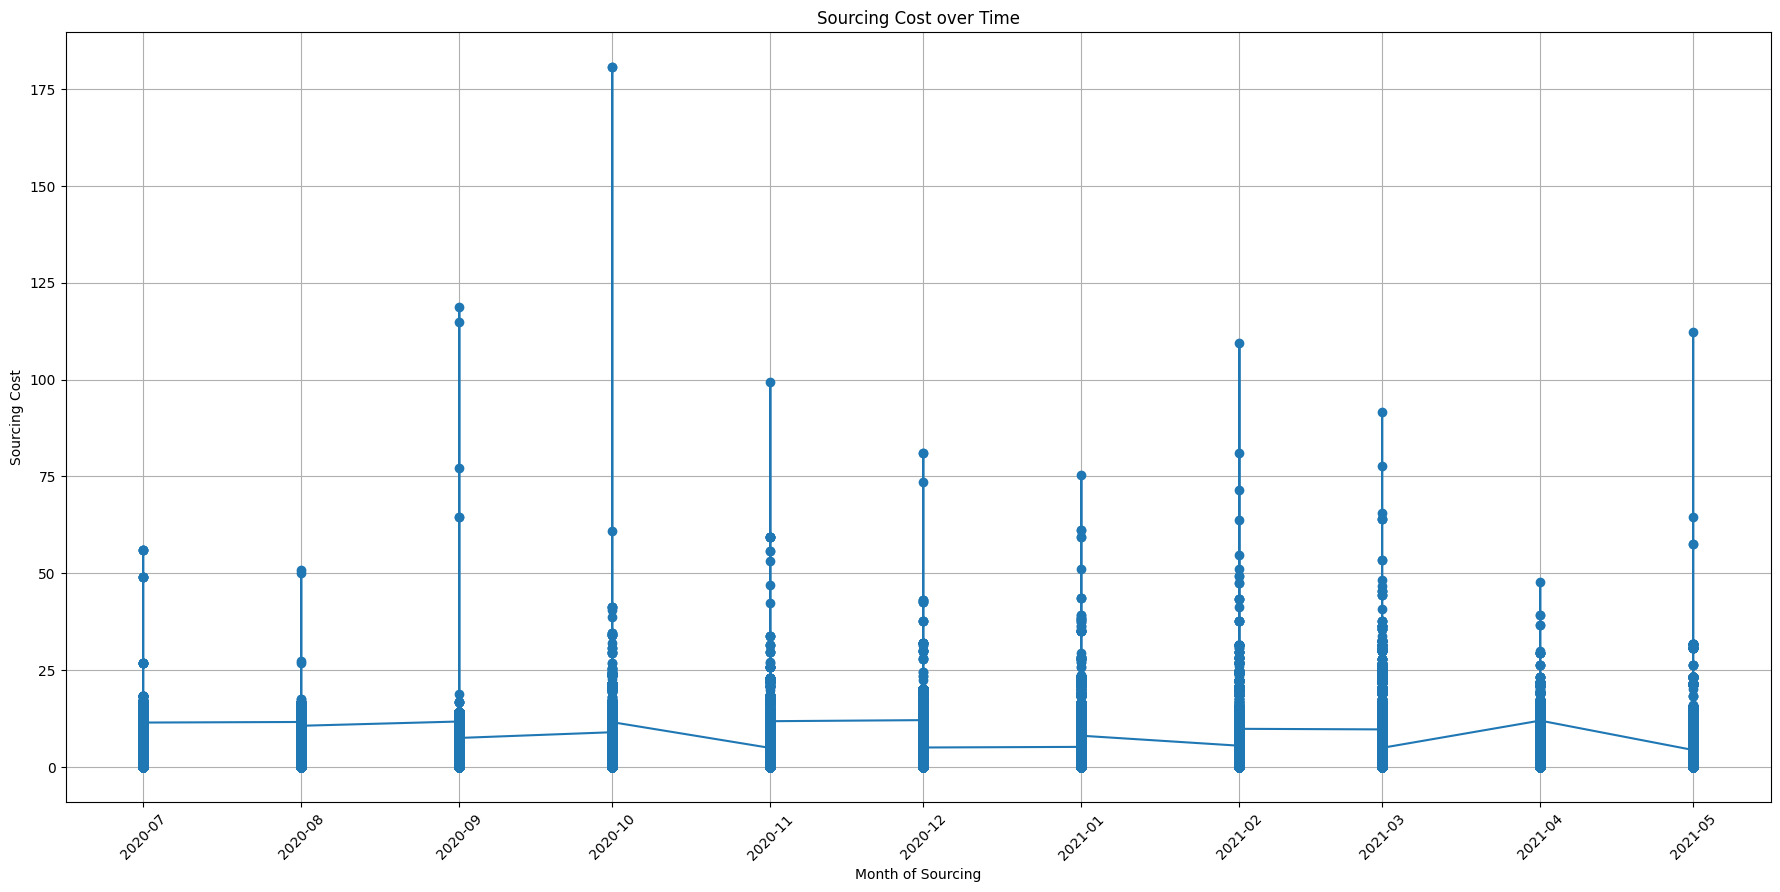

In [75]:
plt.figure(figsize=(22, 10))
plt.plot(train_encoded_data.index, train_encoded_data['Sourcing Cost'], marker='o', linestyle='-')
plt.title("Sourcing Cost over Time")
plt.xlabel("Month of Sourcing")
plt.ylabel("Sourcing Cost")
plt.xticks(rotation=45) 
plt.grid(True)  
plt.show()

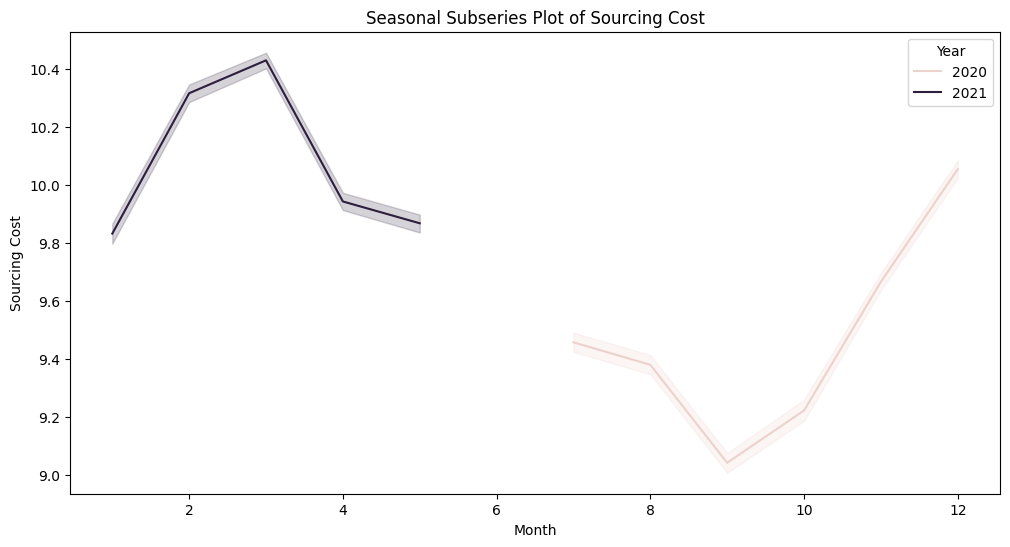

In [92]:
import seaborn as sns

# Extract month from the index 
train_encoded_data['Month'] = train_encoded_data.index.month

# Create a seasonal subseries plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Sourcing Cost', data=train_encoded_data, hue=train_encoded_data.index.year)
plt.title('Seasonal Subseries Plot of Sourcing Cost')
plt.xlabel('Month')
plt.ylabel('Sourcing Cost')
plt.legend(title='Year')
plt.show()


Since, the data available to us is for a short period of time (July-2020 - May-2021), it is hard to predict whether there exists seasonality or not.
Let's assume that seasonality exists as during the months September - March the Sourcing cost gradually increases and only going on to decrease after March. This will be further proved with ADF tests

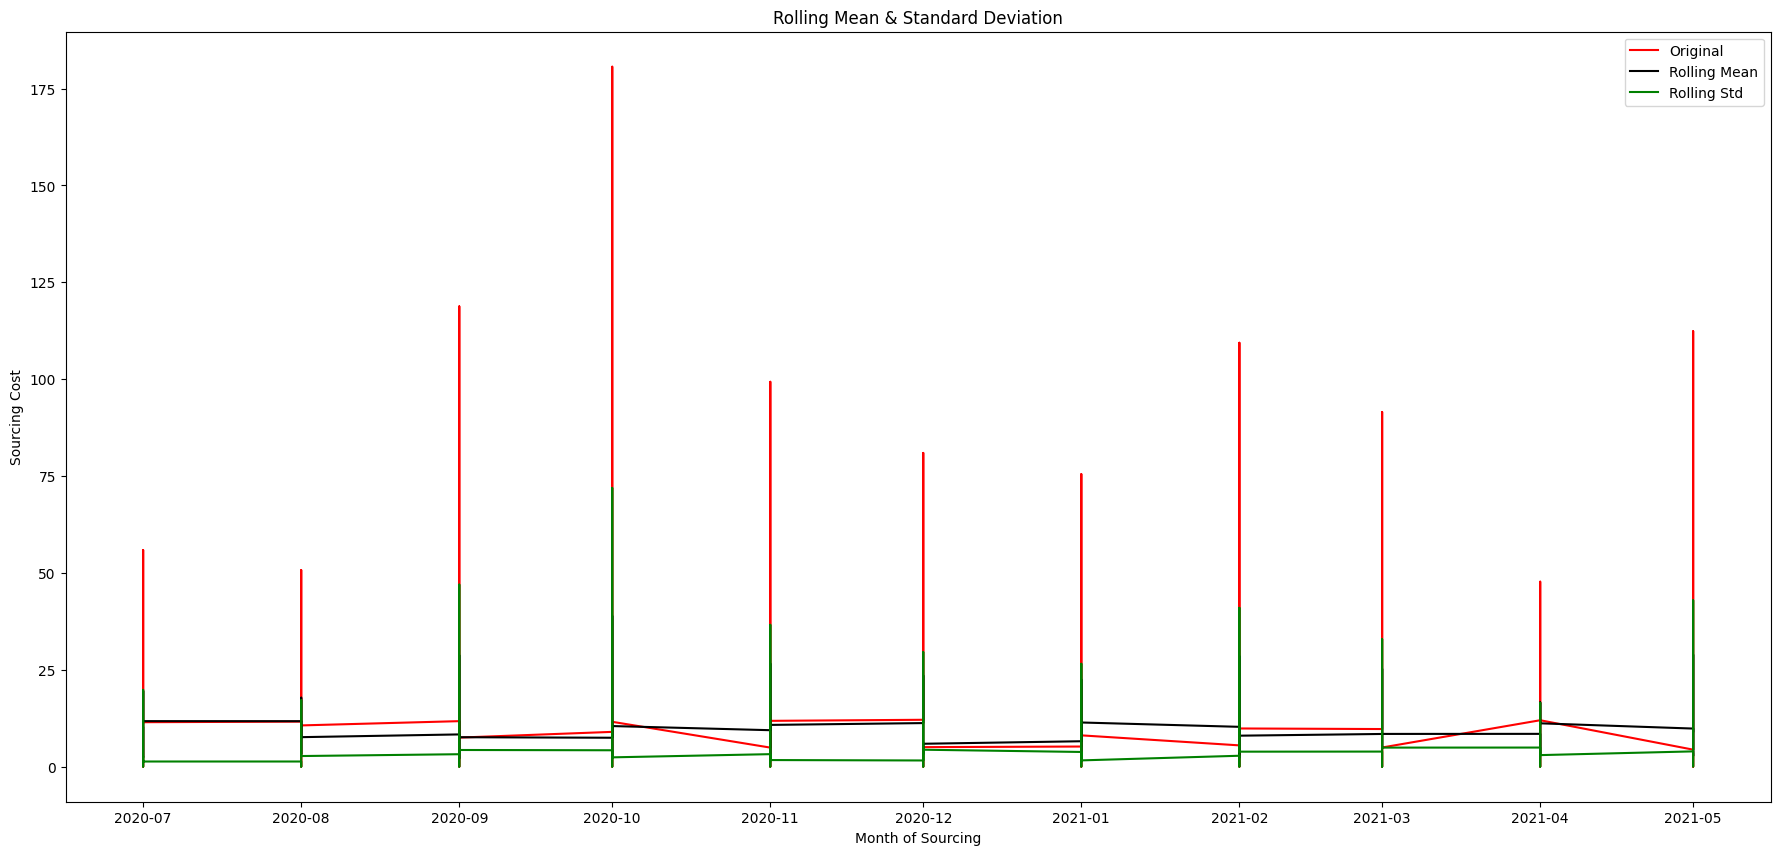

Test statistic: -43.26948654240444
p-value: 0.0
Critical Values: {'1%': -3.4303618881571944, '5%': -2.8615452544266056, '10%': -2.5667727967391603}


In [78]:
from statsmodels.tsa.stattools import adfuller

def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

# check_mean_std function
def check_mean_std(ts):
    rolling_mean = ts.rolling(window=6).mean()
    rolling_std = ts.rolling(window=6).std()
    plt.figure(figsize=(22, 10))   
    orig = plt.plot(ts, color='red', label='Original')
    mean = plt.plot(rolling_mean, color='black', label='Rolling Mean')
    std = plt.plot(rolling_std, color='green', label='Rolling Std')
    plt.xlabel("Month of Sourcing")
    plt.ylabel("Sourcing Cost")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()

check_mean_std(train_encoded_data['Sourcing Cost'])
check_adfuller(train_encoded_data['Sourcing Cost'])


Based on these results  we can say that:
<ol>
    <li>The test statistic is highly negative.</li>
    <li>The p-value is extremely low.</li>
    <li>The test statistic is much lower than the critical values.</li>
</ol>

Thus, we can conclude that there is strong evidence of rejecting the null hypothesis, which indicates that the data is Stationery and is fit for time series analysis

## 5. Train test Split

In [102]:
feature_list = ['Area Code', 'ProductType_NTM1', 'ProductType_NTM2',
       'ProductType_NTM3', 'Manufacturer_X1', 'Manufacturer_X2',
       'Manufacturer_X3', 'Sourcing Channel_DIRECT', 'Sourcing Channel_ECOM',
       'Sourcing Channel_RETAIL', 'Sourcing Channel_WHOLESALE',
       'Product Size_ExtraLarge', 'Product Size_Large', 'Product Size_Small',
       'Product Type_Liquid', 'Product Type_Powder']
target_feature = ['Sourcing Cost']
X_train = train_encoded_data[feature_list]
y_train = train_encoded_data[target_feature]

X_test = test_encoded_data[feature_list]
y_test = test_encoded_data[target_feature]

## 6. Model Training Approaches
There are two approaches which will be pursued to forecast Jun-21 data, 
<ol>
    <li>Fitting Time series analysis models such as ARIMA</li>
    <li>Fitting Machine Learning models</li>
</ol>

This is because, both approaches have multiple pros and cons, Time series models can handle the temporal dependancies present in our model whereas machine learning models which are robust to outliers can perform well on data where outliers are present. 

Also, It'll be clear whether the problem statement actually requires to be solved as a time series problem or only machine learning approaches are needed.

The Machine Learning Models chosen to predict were chosen on the basis of the findings of the following research:
https://arxiv.org/pdf/2303.07139

### 6.1 ARIMA

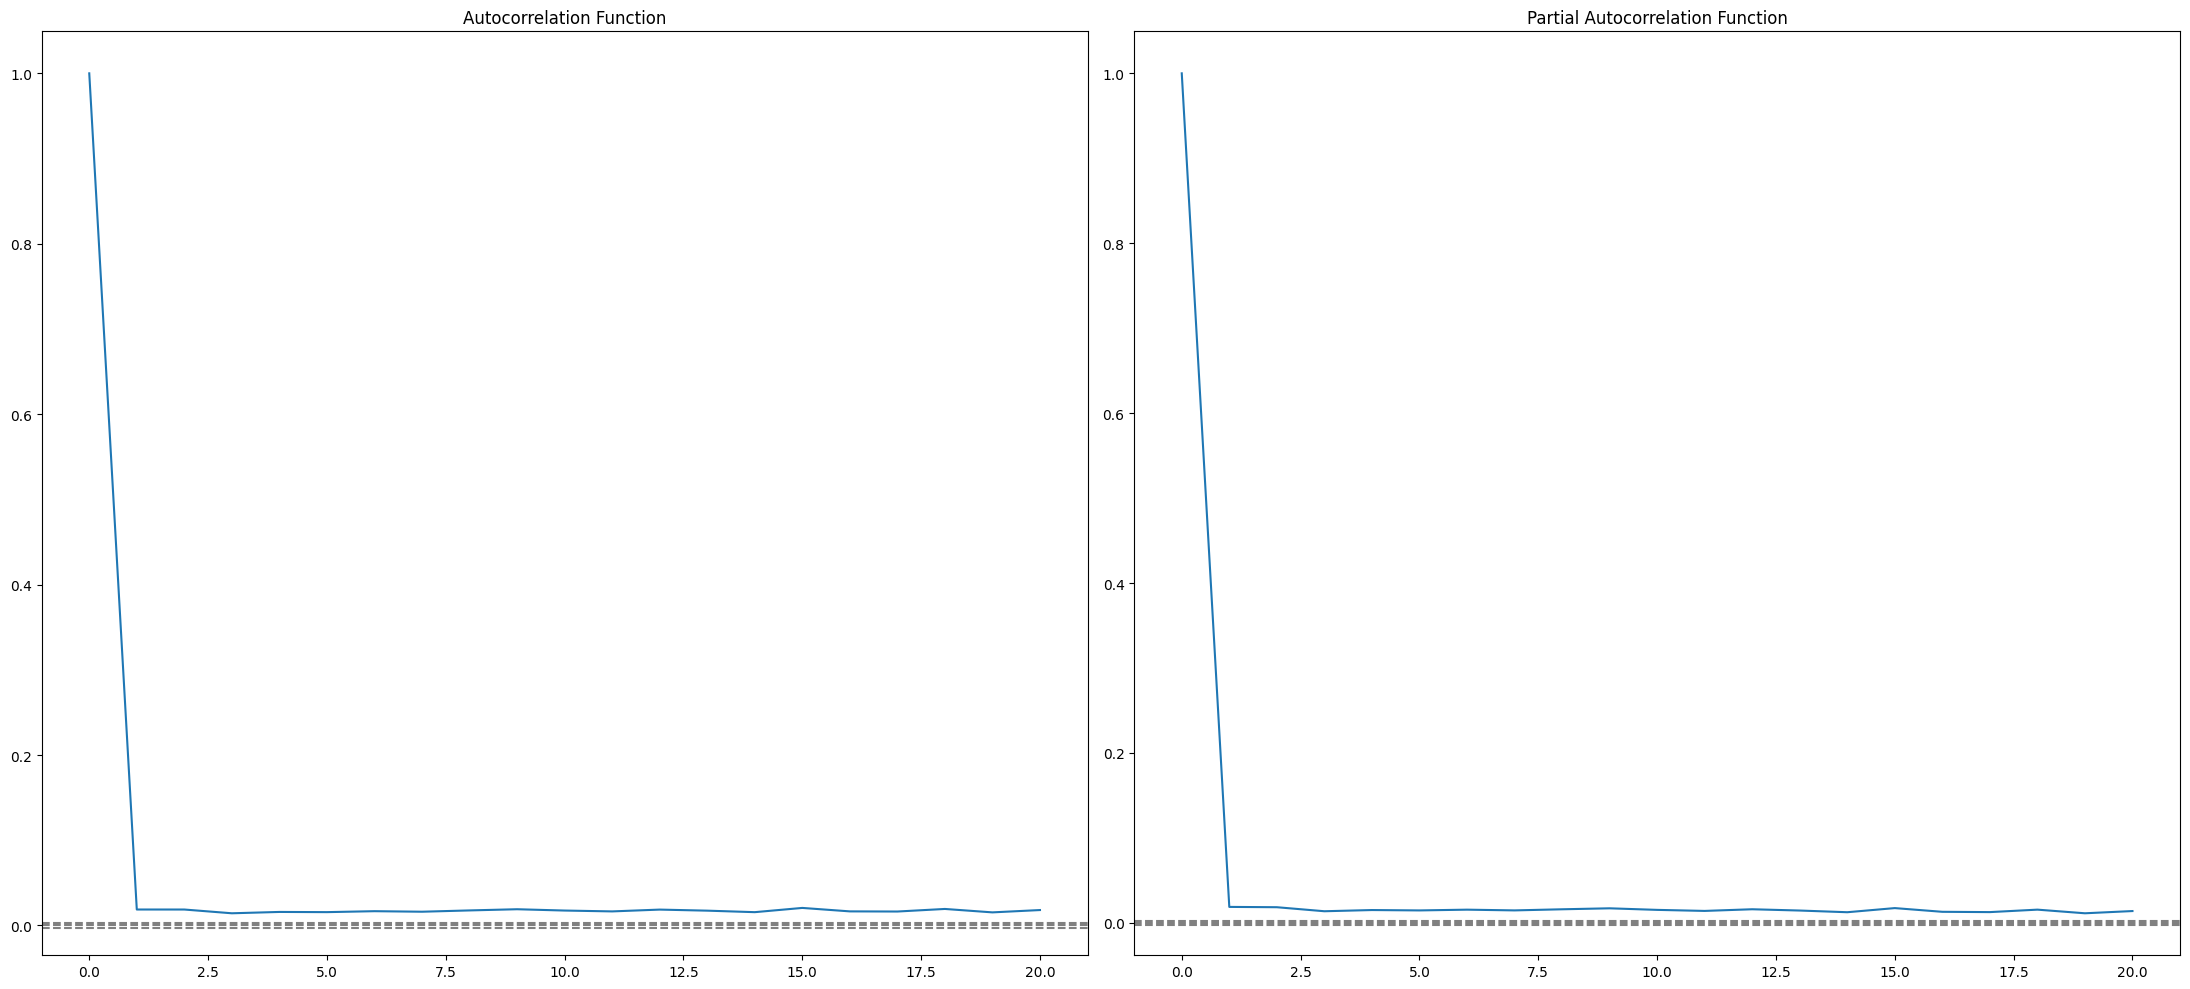

In [88]:
from statsmodels.tsa.stattools import acf, pacf

data_length = len(train_encoded_data)

# Compute ACF and PACF
lagged_acf = acf(train_encoded_data['Sourcing Cost'], nlags=20)
lagged_pacf = pacf(train_encoded_data['Sourcing Cost'], nlags=20, method='ols')

# ACF plot
plt.figure(figsize=(22,10))
plt.subplot(121) 
plt.plot(lagged_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(data_length), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(data_length), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

# PACF plot
plt.subplot(122)
plt.plot(lagged_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(data_length), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(data_length), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()


Since,plots remain above the upper confidence interval (dotted line) and do not cross it at any lag, it suggests that there is significant autocorrelation and partial autocorrelation at multiple lags. Thus, Experimentation with multiple valuesof p,q and d will help us identify the model that performs best

In [143]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_encoded_data['Sourcing Cost'], order=(2, 1, 0)) 
results_ARIMA = model.fit()



C:\Users\Saahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Saahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Saahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


C:\Users\Saahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


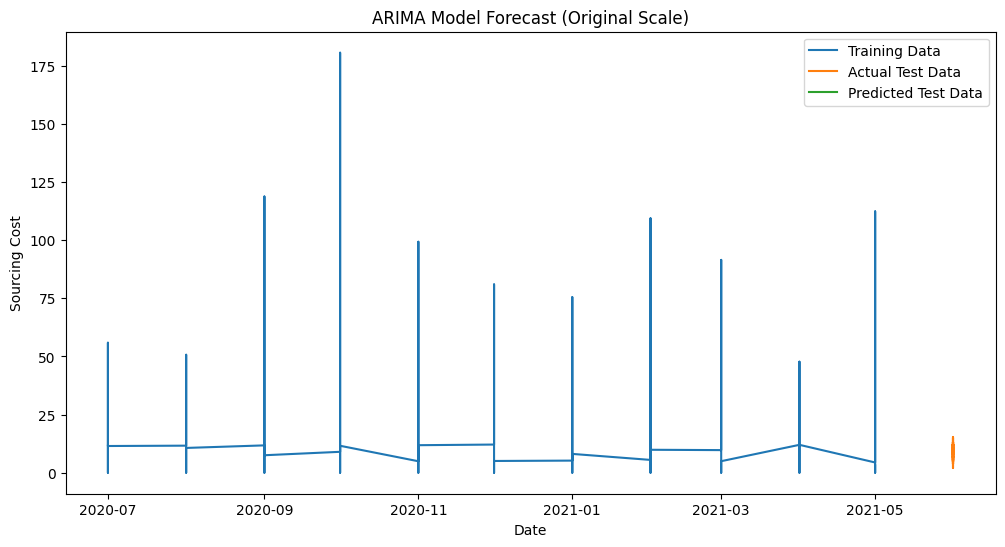

In [145]:
forecast_values = results_ARIMA.forecast(steps=len(test_encoded_data))

# Plot predictions in the original scale
plt.figure(figsize=(12, 6))
plt.plot(train_encoded_data.index, train_encoded_data['Sourcing Cost'], label='Training Data')
plt.plot(test_encoded_data.index, test_encoded_data['Sourcing Cost'], label='Actual Test Data')
plt.plot(test_encoded_data.index, forecast_original_scale, label='Predicted Test Data')
plt.title('ARIMA Model Forecast (Original Scale)')
plt.xlabel('Date')
plt.ylabel('Sourcing Cost')
plt.legend()
plt.show()


In [149]:
actual_values = test_encoded_data['Sourcing Cost'].to_numpy()  
mse = np.mean((actual_values - forecast_original_scale) ** 2)
mae = np.mean(np.abs(actual_values - forecast_original_scale))
mean_actual = np.mean(actual_values)
total_squared_dev_actual = np.sum((actual_values - mean_actual) ** 2)
total_squared_dev_predicted = np.sum((actual_values - forecast_original_scale) ** 2)

r2 = 1 - (total_squared_dev_predicted / total_squared_dev_actual)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 7541.421055844331
Mean Absolute Error: 86.79471399233661
R-squared: -930.1915204346259


Thus, Based on the above metrics it is clear that the model performs extremly poor on the ARIMA time series model. Indicating and thereby confirming the question of the data being un-sequential in nature. While this is a naive assumption as other time series models need to be applied to come to a final conclusion but due to constraint of time ARIMA is the only comaprsion with ML models


Therefore, for the final approach machine learning models such as RandomForestRegressor and XGBoost will be applied.

### 6.2 RandomForestRegressor

In [150]:
from sklearn.ensemble import RandomForestRegressor

In [151]:
rf = RandomForestRegressor(bootstrap=True,random_state = 42)
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [152]:
predictions = rf.predict(X_test)

In [155]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
# Evaluating the model performances
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)
rmse = mean_squared_error(y_test, predictions, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)
r2 = r2_score(y_test, predictions)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 1.0681140450244073
Mean Squared Error (MSE): 4.0433212910065395
Root Mean Squared Error (RMSE): 2.010801156506167
R-squared (R2): 0.5007430996496011


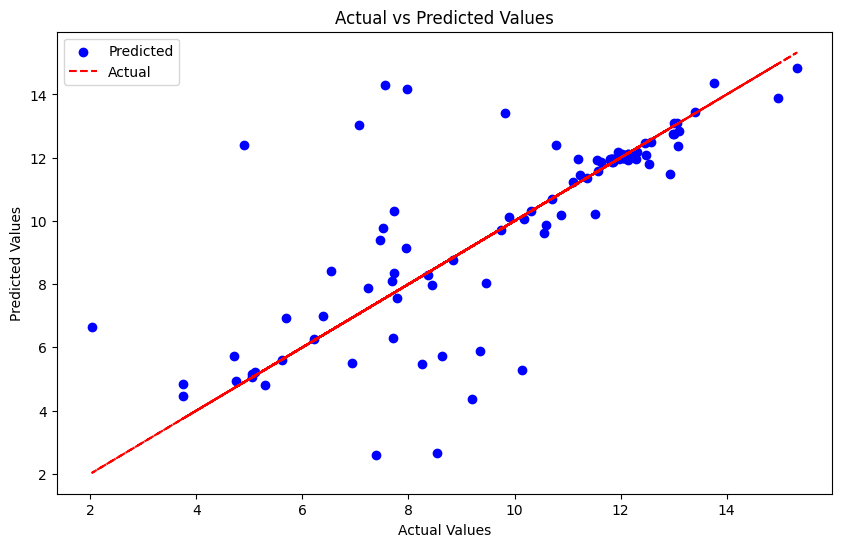

In [165]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', label='Predicted')
plt.plot(y_test, y_test, color='red', label='Actual', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


In [182]:
from sklearn.model_selection import KFold
# K fold cross validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)  

rmse_scores = []
mae_scores = []
r2_scores = []

for train_index, test_index in kf.split(X_train):
    X_fold_train, X_fold_test = X_train.iloc[train_index], X_train.iloc[test_index]
    y_fold_train, y_fold_test = y_train.iloc[train_index], y_train.iloc[test_index]

    rf.fit(X_fold_train, y_fold_train)

    y_pred = rf.predict(X_fold_test)

    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    rmse = np.sqrt(mean_squared_error(y_fold_test, y_pred))
    mae = mean_absolute_error(y_fold_test, y_pred)
    r2 = r2_score(y_fold_test, y_pred)

    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_scores.append(r2)

print("Average RMSE:", np.mean(rmse_scores))
print("Average MAE:", np.mean(mae_scores))
print("Average R-squared:", np.mean(r2_scores))

Average RMSE: 2.064496029300085
Average MAE: 0.9651935967677133
Average R-squared: 0.6775306332783753


Based on the results of K-Fold Cross validation of RandomForestRegressor, the following observations were noted:
<ol>
    <li>The model explains about 67% of the variance in the actual data. Which is a great starting point and can be improved further by applying hyperparameter tuning such as GridSearchCV.</li>
    <li>Similarly, An average error of 0.96 was observed</li>
    <li>And based on our problem statement, an average error of 0.96 unit is significant for the use case as it is the nearest to the original value.</li>
</ol>

### 6.3 XGBoost

In [183]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

predictions_xgb = xgb.predict(X_test)


In [185]:
mae_xg = mean_absolute_error(y_test, predictions_xgb)
print("Mean Absolute Error (MAE):", mae_xg)
mse_xg = mean_squared_error(y_test, predictions_xgb)
print("Mean Squared Error (MSE):", mse_xg)
rmse_xg = mean_squared_error(y_test, predictions_xgb, squared=False)
print("Root Mean Squared Error (RMSE):", rmse_xg)
r2_xg = r2_score(y_test, predictions_xgb)
print("R-squared (R2):", r2_xg)


Mean Absolute Error (MAE): 1.0685797325808741
Mean Squared Error (MSE): 4.041929089809851
Root Mean Squared Error (RMSE): 2.010454945978609
R-squared (R2): 0.5009150043794253


In [187]:
# K fold cross validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)  

rmse_xg_scores = []
mae_xg_scores = []
r2_xg_scores = []

for train_index, test_index in kf.split(X_train):
    X_fold_train, X_fold_test = X_train.iloc[train_index], X_train.iloc[test_index]
    y_fold_train, y_fold_test = y_train.iloc[train_index], y_train.iloc[test_index]

    xgb.fit(X_fold_train, y_fold_train)

    y_pred = xgb.predict(X_fold_test)

    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    rmse_xgb = np.sqrt(mean_squared_error(y_fold_test, y_pred))
    mae_xgb = mean_absolute_error(y_fold_test, y_pred)
    r2_xgb = r2_score(y_fold_test, y_pred)

    rmse_xg_scores.append(rmse_xgb)
    mae_xg_scores.append(mae_xgb)
    r2_xg_scores.append(r2_xgb)

print("Average RMSE:", np.mean(rmse_xg_scores))
print("Average MAE:", np.mean(mae_xg_scores))
print("Average R-squared:", np.mean(r2_xg_scores))

Average RMSE: 2.064485333575252
Average MAE: 0.965199403322129
Average R-squared: 0.6775339965675944


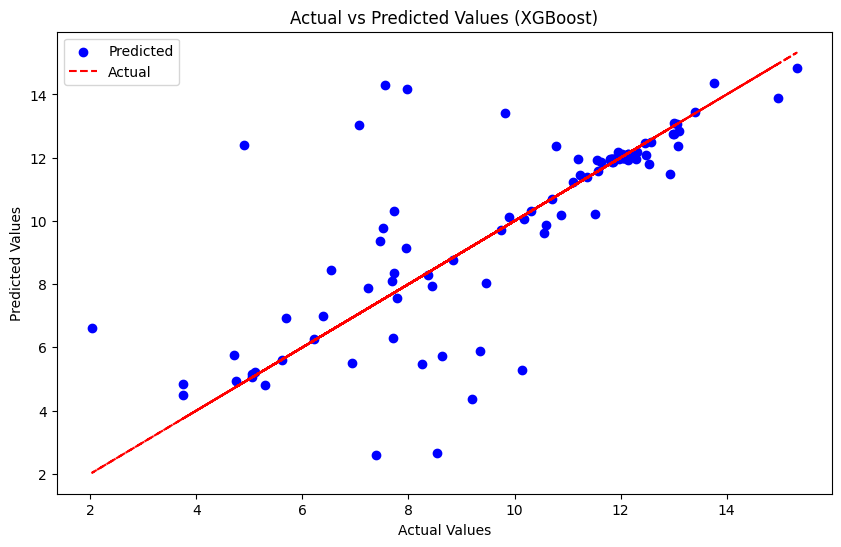

In [194]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_xgb, color='blue', label='Predicted')
plt.plot(y_test, y_test, color='red', label='Actual', linestyle='--')
plt.title('Actual vs Predicted Values (XGBoost)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

Interesting observation here is that, XGBoost performs exactly similar to RandomForest giving same values for its metrics used for evaluation.
Hence, XGBoost will have a similar impact in forecasting 'Sourcing Cost' as Random Forest, and will be the go to model as its average error is significantly low.

### 6.4 Decision Tree Regressor

In [208]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 42)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [209]:
predictions_dtr = dtr.predict(X_test)


In [210]:
mae_dtr = mean_absolute_error(y_test, predictions_dtr)
print("Mean Absolute Error (MAE):", mae_dtr)
mse_dtr = mean_squared_error(y_test, predictions_dtr)
print("Mean Squared Error (MSE):", mse_dtr)
rmse_dtr = mean_squared_error(y_test, predictions_dtr, squared=False)
print("Root Mean Squared Error (RMSE):", rmse_dtr)
r2_dtr = r2_score(y_test, predictions_dtr)
print("R-squared (R2):", r2_dtr)

Mean Absolute Error (MAE): 1.0685971236541398
Mean Squared Error (MSE): 4.042071113046769
Root Mean Squared Error (RMSE): 2.010490266837114
R-squared (R2): 0.5008974677861302


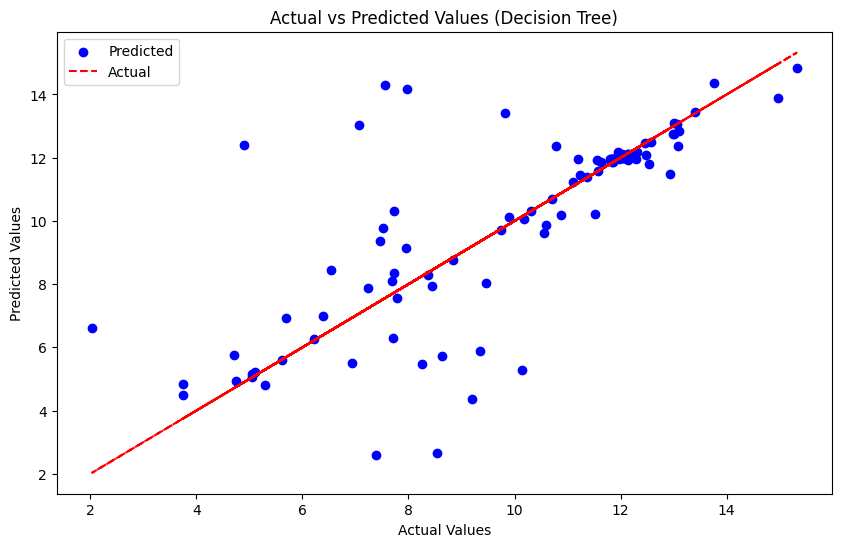

In [195]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_dtr, color='blue', label='Predicted')
plt.plot(y_test, y_test, color='red', label='Actual', linestyle='--')
plt.title('Actual vs Predicted Values (Decision Tree)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

No difference was observed between the predictions from Decision Tree, Random Forest and XGBoost showing very consistent predictions across all models

## 7. Results and Discussion


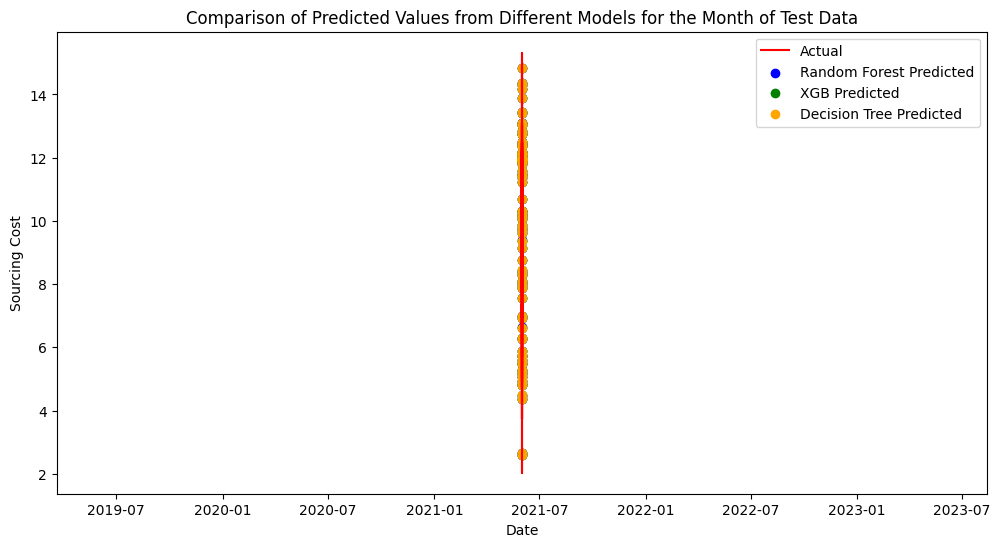

In [219]:
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(test_month_data.index, actual_month_data, color='red', label='Actual', linestyle='-')

plt.scatter(test_month_data.index, predictions, color='blue', label='Random Forest Predicted')
plt.scatter(test_month_data.index, predictions_xgb, color='green', label='XGB Predicted')
plt.scatter(test_month_data.index, predictions_dtr, color='orange', label='Decision Tree Predicted')

plt.title('Comparison of Predicted Values from Different Models for the Month of Test Data')
plt.xlabel('Date')
plt.ylabel('Sourcing Cost')
plt.legend()
plt.show()

The above generated plot suggests how close the predictions of all three models are with respect to the actual line and thus, showcasing great forcasting skills which can directly benefit the company in predicting the sourcing cost of products, leading to appropriate decision making regarding the specific logistics.

### 7.1 Findings

### Performance of ARIMA Model
   - The ARIMA time series model performed poorly based on the evaluation metrics.
    The mean squared error (MSE) and mean absolute error (MAE) were notably high, indicating significant discrepancies between the predicted and actual values.
    The negative R-squared value suggests that the model failed to explain any of the variance in the data, indicating that it may not be suitable for capturing the underlying patterns in the dataset.
<br>
<br>
### Comparison with Machine Learning Models
- RandomForestRegressor and XGBoost models outperformed the ARIMA model significantly.
    Both models achieved a similar level of performance, with an average R-squared value of approximately 0.68, indicating that they explain about 68% of the variance in the data.
    The average MAE of approximately 0.96 suggests that the models are accurate in their predictions, with minimal errors on average.
<br>
<br>
### Results for Forecasting 'Sourcing Cost'
- The findings suggest that machine learning models, particularly RandomForestRegressor and XGBoost, are more suitable for forecasting 'Sourcing Cost' compared to the ARIMA model.
    The consistent performance across different models indicates robustness in predicting 'Sourcing Cost', which is crucial for decision-making in sourcing and procurement activities.

<br>

### Future Directions
- Further optimization and fine-tuning of the machine learning models, such as hyperparameter tuning using techniques like GridSearchCV, could potentially improve their performance.
    Exploring additional features or incorporating domain knowledge could enhance the accuracy of the models and provide more meaningful insights for decision-making.



## 7.2 Recommendations based on EDA

### Product and Channel Analysis

- **Product Type and Manufacturer Insights:** Leverage insights from the analysis of product types and manufacturers to optimize sourcing strategies. Consider prioritizing product types and manufacturers associated with lower sourcing costs.
- **Sourcing Channels Optimization:** Explore ways to optimize sourcing channels based on cost efficiency. Direct sourcing channels may offer cost advantages over retail, e-commerce, and wholesale channels.

### Geospatial Analysis

- **Geographical Cost Analysis:** Analyze geographical variations in sourcing costs to identify opportunities for cost optimization. Develop strategies to reduce sourcing costs in areas with higher costs, such as area code A23, while leveraging insights from areas with lower costs, such as area code A14.

### Temporal Analysis

- **Temporal Cost Trends:** Monitor temporal trends in sourcing costs to identify patterns and seasonality. Develop strategies to mitigate cost spikes observed during specific months, such as February and March 2021, to ensure cost stability over time.


### Continuous Improvement

- **Iterative Analysis:** Continuously monitor and analyze sourcing cost data to identify evolving trends and patterns. Implement a feedback loop to refine models and strategies based on new insights and data.
